<a href="https://colab.research.google.com/github/teffakin/hw/blob/main/DNM_DAwPy_EDA_Project_(Analyze_US_Citizens)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [91]:
df = pd.read_csv("adult_eda.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [92]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [93]:
df.shape


(32561, 15)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [95]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [96]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [97]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [98]:
df.describe(include=[np.object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [99]:
#look at workclass column here
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [100]:
a = pd.DataFrame(df.loc[(df['workclass'])== '?'])
a

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [101]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [102]:
#replace all '?' in whole df with 'Unknown'
df["workclass"].replace(to_replace='?', value='Unknown', inplace=True)
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [103]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [104]:
df.education

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [105]:
df['education-num']

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [106]:
df[['education','education-num']].value_counts()

education     education-num
HS-grad       9.0              10215
Some-college  10.0              7098
Bachelors     13.0              5247
Masters       14.0              1687
Assoc-voc     11.0              1343
11th          7.0               1146
Assoc-acdm    12.0              1044
10th          6.0                916
7th-8th       4.0                631
Prof-school   15.0               559
9th           5.0                503
12th          8.0                424
Doctorate     16.0               405
5th-6th       3.0                330
1st-4th       2.0                161
Preschool     1.0                 50
dtype: int64

In [107]:
df['education-num'].value_counts()

9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: education-num, dtype: int64

In [108]:
#drop one of them here
df.drop(['education-num'], axis=1, inplace=True)


In [109]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [110]:
df.corr(method='pearson')

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [111]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [112]:
#age column
iqr = df.age.quantile(0.75) - df.age.quantile(0.25) 

In [113]:
upper_lim= df.age.quantile(0.75) + (1.5*iqr)

In [114]:
df[df["age"] >=   upper_lim  ]["age"].value_counts()

90    43
78    23
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

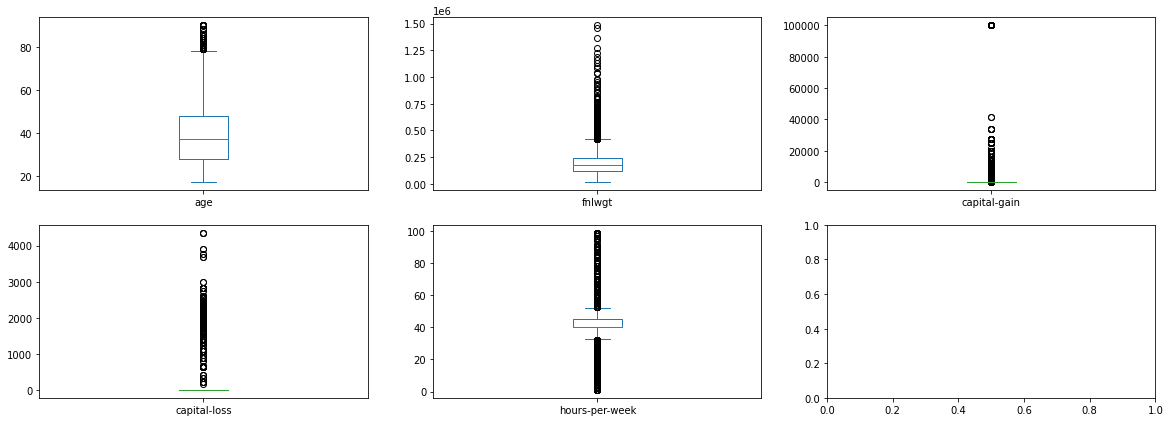

In [115]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [116]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
25831,31,Private,147284,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,99,United-States,>50K
15460,37,Private,241174,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K
9811,28,Private,27956,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,99,Philippines,<=50K
22313,26,Self-emp-not-inc,258306,10th,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
21056,64,Local-gov,142166,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K
16992,19,Private,121074,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K
19731,34,Federal-gov,345259,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
11833,58,Private,164857,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
13617,49,Private,173115,10th,Separated,Exec-managerial,Not-in-family,Black,Male,4416,0,99,United-States,<=50K
26250,36,Self-emp-not-inc,257250,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K


In [117]:
#hours per week column
IQR = df['hours-per-week'].quantile(0.75) - df['hours-per-week'].quantile(0.25)
IQR

5.0

In [118]:
upper_limt= df['hours-per-week'].quantile(0.75) + 1.5*IQR
upper_limt

52.5

In [119]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

In [120]:
df.loc[(df["hours-per-week"] >= upper_limt) & (df["age"] >= upper_lim)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10546,78,Unknown,33186,7th-8th,Married-civ-spouse,?,Husband,White,Male,0,0,60,United-States,<=50K
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [121]:
#drop_index=

In [122]:
df.drop(df[(df["hours-per-week"] >= upper_limt) & (df["age"] >= upper_lim)].index, inplace=True)

In [123]:
# check outlier values which extends the upper limit in both age and hours-per-week columns
df.loc[(df["hours-per-week"] >= upper_limt) & (df["age"] >= upper_lim)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [124]:
df['relationship'].value_counts()


Husband           13189
Not-in-family      8301
Unmarried          3444
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [125]:
df['relationship'].replace(to_replace=[np.nan, 'Not-in-family', 'Other-relative'], value='Unmarried', inplace=True)

In [126]:
df.relationship.value_counts()

Unmarried    17794
Husband      13189
Wife          1568
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [127]:
race_count = df['race'].value_counts()
race_count

White                 27806
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

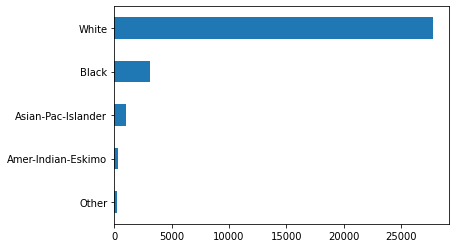

In [128]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [129]:
average_age_men = df.loc[df["sex"] == "Male", "age"].mean()
average_age_men

39.41267217630854

In [130]:
round(average_age_men,1)

39.4

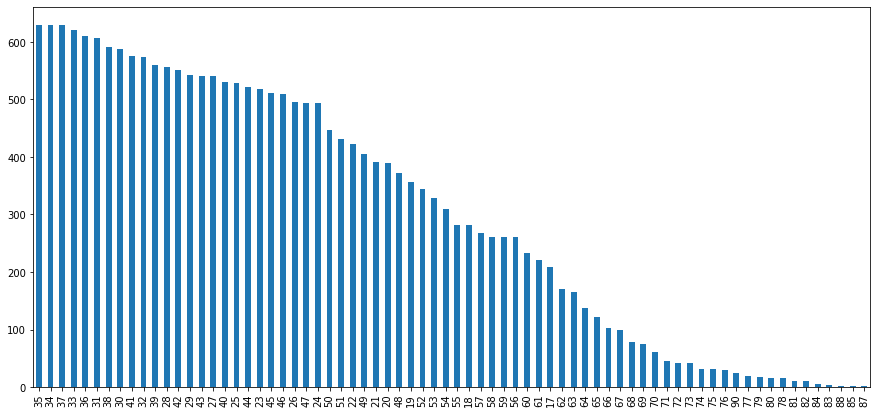

In [131]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [132]:
average_age_women = df.loc[df["sex"] == "Female", "age"].mean()
average_age_women 

36.85823043357163

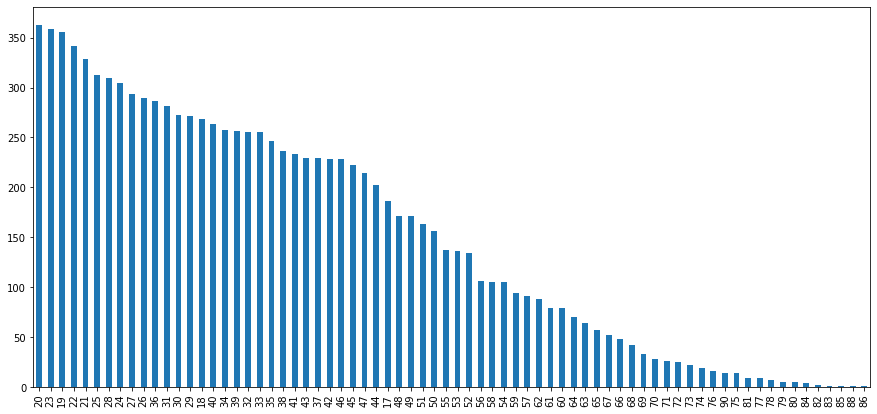

In [133]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [134]:
df.education.value_counts().sort_index(ascending=True)

10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

In [135]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [136]:
upper = df["education"].value_counts().loc["Bachelors"] 

lower = df.education.count()

percentage_bachelors = upper / lower * 100

percentage_bachelors

16.444963288378236

In [137]:
df["education"].value_counts(normalize=True)

HS-grad         0.322540
Some-college    0.223956
Bachelors       0.164450
Masters         0.052840
Assoc-voc       0.042456
11th            0.036097
Assoc-acdm      0.032779
10th            0.028663
7th-8th         0.019815
Prof-school     0.017665
9th             0.015791
12th            0.013302
Doctorate       0.012688
5th-6th         0.010230
1st-4th         0.005161
Preschool       0.001567
Name: education, dtype: float64

In [138]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [139]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [140]:
df.salary.value_counts()

<=50K    24713
>50K      7838
Name: salary, dtype: int64

In [141]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [142]:
higher_education = (df['education']=='Bachelors') | (df['education']=='Masters') | (df['education']=='Doctorate')
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32551, dtype: bool

In [143]:
df_high_edu = df[(df['education']=='Bachelors') | (df['education']=='Masters') | (df['education']=='Doctorate')]
df_high_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [144]:
df_high_edu[df_high_edu['salary']=='>50K']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K


In [157]:
#count = df[df_low_edu[df_low_edu.salary=='>50K']].value_counts().sum()
count = len(df_high_edu[df_high_edu.salary=='>50K'])
count

3484

In [159]:
perc_high_edu = count/len(df)     

In [160]:
perc_high_edu

0.10703204202635863

In [161]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.7


---
# What percentage of people without advanced education make more than 50K?
---

In [146]:
lower_education =  (df['education']!='Bachelors') & (df['education']!='Masters') & (df.education!='Doctorate')

In [147]:
df_low_edu = df[ (df['education']!='Bachelors') & (df['education']!='Masters') & (df.education!='Doctorate')]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K


In [148]:
df_low_edu[df_low_edu.salary=='>50K']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,Unknown,180211,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [149]:
count = len(df_low_edu[df_low_edu.salary=='>50K'])

In [150]:
count

4354

In [151]:
perc_low_edu = count/len(df)
perc_low_edu 

0.13375933151055266

In [152]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.38


In [162]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [163]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1471
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [164]:
lazy_riches = (df['hours-per-week']==df['hours-per-week'].min()) & (df.salary=='>50K')
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32551, dtype: bool

In [ ]:
#df[lazy_riches]

In [165]:
num_lazy_riches = df[(df["hours-per-week"]== df['hours-per-week'].min()) & (df["salary"]== ">50K")].value_counts().sum()
num_lazy_riches

2

In [166]:
num_min_workers = len(df[df['hours-per-week']== df['hours-per-week'].min()])
num_min_workers

20

In [167]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [168]:
country_salary_df = df.groupby("native-country")[["salary"]].count()
country_salary_df

,salary
native-country,
?,582
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106


In [169]:
country_salary_df_riches =  df[df.salary=='>50K'].groupby('native-country')[['salary']].count()
country_salary_df_riches

,salary
native-country,
?,146
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9


In [170]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values('salary',ascending=False)
rich_per_country

,salary
native-country,
Iran,0.418605
France,0.413793
India,0.400000
Taiwan,0.392157
Japan,0.387097
Yugoslavia,0.375000
Cambodia,0.368421
Italy,0.342466
England,0.333333


In [171]:
rich_per_country[rich_per_country.salary==rich_per_country.salary.max()][::1]

,salary
native-country,
Iran,0.418605


In [172]:
#use iloc here
rich_per_country.iloc[[0]]

,salary
native-country,
Iran,0.418605


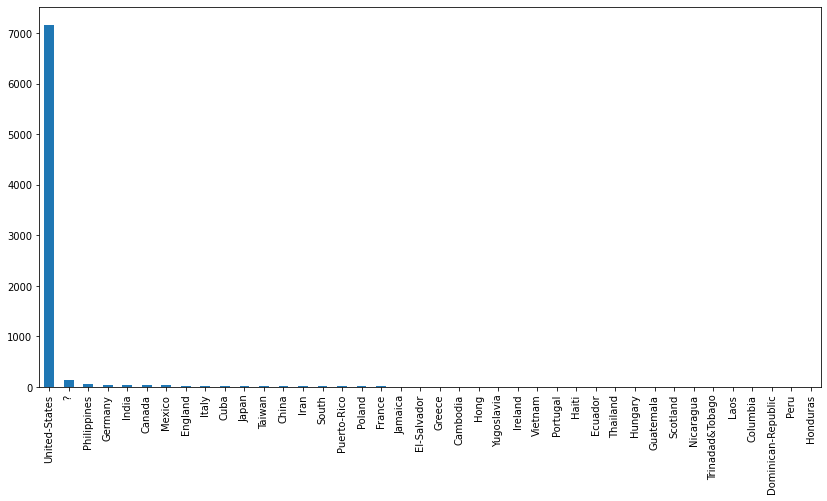

In [173]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

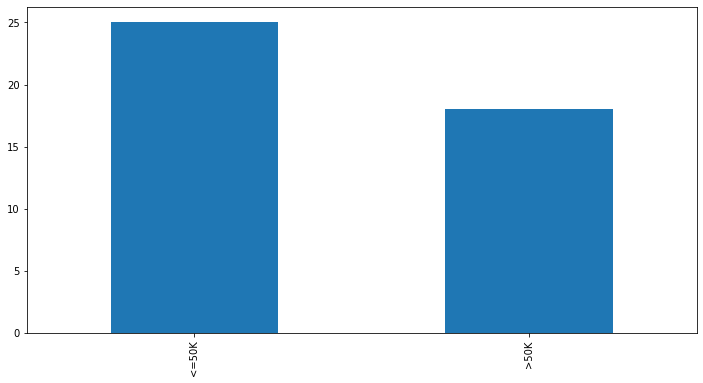

In [174]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [175]:
top_IN_occupation = ((df.salary=='>50K') & df['native-country']=='India')

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32551, dtype: bool

In [177]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [55]:
df[top_IN_occupation]['occupation'].value_counts()

Series([], Name: occupation, dtype: int64)

'Prof-specialty'

In [ ]:
a =  #use mode here
a

'Prof-specialty'

In [ ]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---